# Numpy explained - meshgrid

When searching the web for explanations of `numpy.meshgrid` function, I found that most of them are useless. They contain very abstract description copied from the documentation and provide one simple example that doesn't explain anything why it works the way it does. And in many cases they forgot that more than 2 dimensions exist. And what is this `indexing='ij'` parameter? In this post I will try to explain how `meshgrid` works and why it is useful.  

## Introduction - How to keep array of points in 2D space?

Imagine a problem, that you have to store some function $f(x) = y$ on the Cartesian plane (meaning "x-y" plane). 
To keep things simple let's assume the function is $f(x) = x^2$.
A person not familiar with numpy or programming, but familiar with discrete functions from the school, would probably write something like this:

**First approach:**
```python
# "arr" is an array of values
arr[0] = 0
arr[1] = 1
arr[2] = 4
arr[3] = 9
arr[4] = 16
#in general: arr[x] = y
```

But this code has various problems. It only works when the "x" values are non-negative integers. When you have some function that doesn't have discrete values or they don't appear in equal intervals, you can't store it in this way. The natural way to store such a function is to create a **new array, that represents the the "x" values**. This way, to store one function (or one set of points on the graph), you need two arrays: one for "x" values and one for "y" values. 

**Better approach:**
```python
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 4, 9, 16])
```

In this case, the "x" array represents simple indexes, but in general it can be any array of values. As a generalization, we will think of this two arrays as a set of points in 2D space. Some confusion may arise from the fact, that each point has index, so we have like 3 things: index, x value and y value. But the order of the points is actually not as important as it may seem.

Let's do the plot of this two functions:

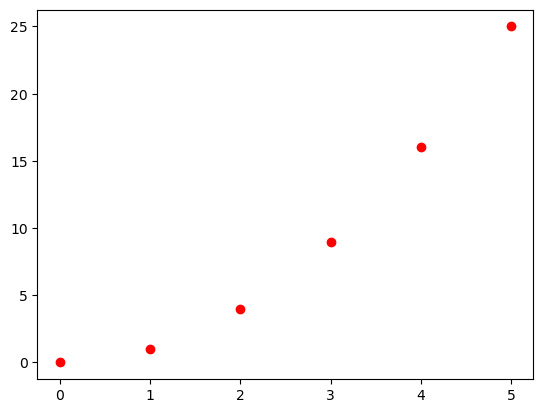

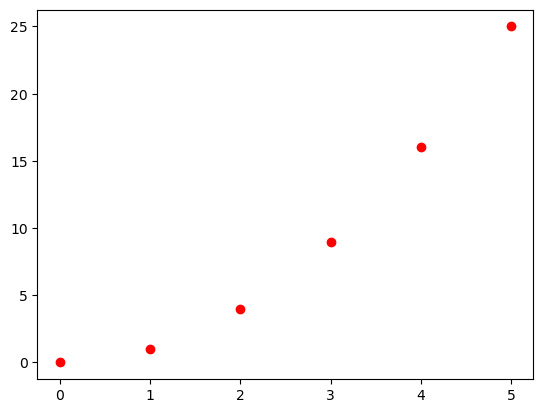

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 9, 16, 25])

plt.plot(x, y, 'ro')
plt.show()

# Changing the order of the points...
x = np.array([3, 1, 2, 0, 5, 4])
y = np.array([9, 1, 4, 0, 25, 16])

# does it change the plot?
plt.plot(x, y, 'ro')
plt.show()


After changing the order of the points, the plot looks the same. 

Note that the continous functions are also stored that way. If you think about this, it's not possible to store infinite number of points in the computer memory. What we have to do is to store some of them and if they are close enough, we won't see the difference. To store a continous function in the computer memory to use it in some way, we have to create two arrays:
one for "x" values and one for "y" values. The "x" values are usually generated by using `np.linspace` or `np.arange` function.

**In general, when we want to store some N-dimensional set of points in numpy, we have to create N arrays.**

## Meshgrid - what is it?

The `meshgrid` function is a way to create a grid of points in a many dimensional space. Simmilary to the graphs we generated above, we want to create graphs that will represent a grid of points.

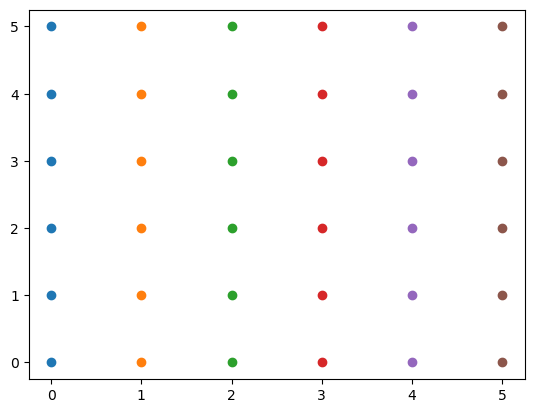

In [32]:
gx, gy = np.meshgrid(np.arange(6), np.arange(6))
plt.plot(gx, gy, 'o')
plt.show()

Each point has coordinates $(x_1, x_2, x_3, ..., x_N)$, where $x_1$ is the coordinate of the first axis, $x_2$ is the coordinate of the second axis and so on. The grid is created by taking all possible combinations of the points from the input arrays. We can imagine that each input array great a line, and the points are where the lines intersect.

The output of the `meshgrid` function is a list of arrays, where each array represents one dimension.

In [33]:
print("gx:")
print(gx)
print("gy:")
print(gy)

gx:
[[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]]
gy:
[[0 0 0 0 0 0]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [4 4 4 4 4 4]
 [5 5 5 5 5 5]]


We have array of values of the first dimension x - gx and array of values of the second dimension y - gy. One point one grid has it's position determined by the coresponding values in each array - see the ilustration below. The point takes it's first dimension value from the gx array and the second dimension value from the gy array.

![Screenshot from 2024-10-12 21-36-43.png](<attachment:Screenshot from 2024-10-12 21-36-43.png>)

In the introduction I said that each point on the graph has also it's index in the arrays, that is not important (as the order is not important). Here, each point has two indices, because we have two dimension.

## Why not use 1-dim arrays?

When I try to flatten the 2D coords arrays to 1D arrays, I have:
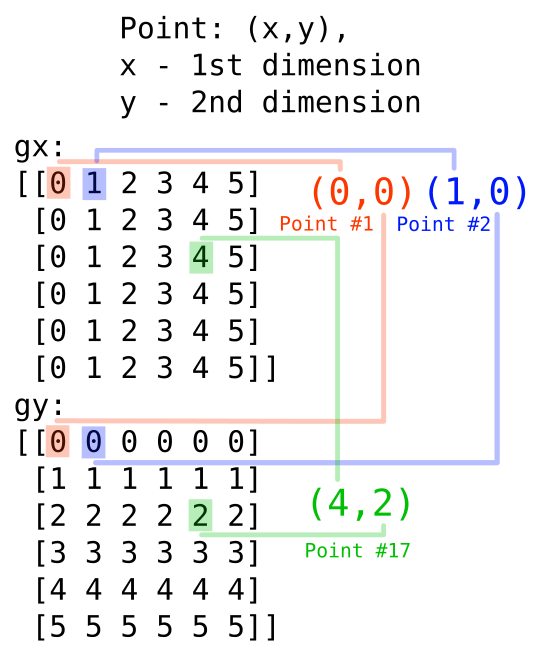

gx:
[0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5]
gy:
[0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5]


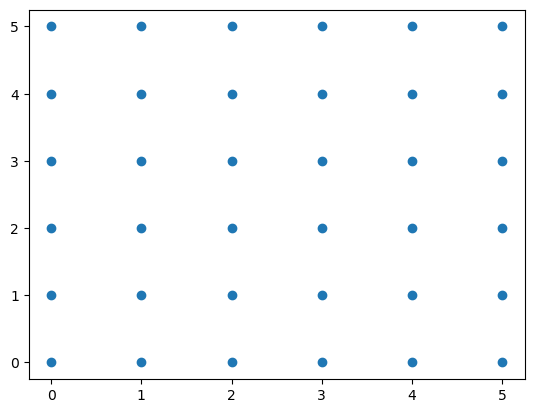

In [34]:
gx = gx.flatten()
gy = gy.flatten()
print("gx:")
print(gx)
print("gy:")
print(gy)

plt.plot(gx, gy, 'o')
plt.show()

We have exacly the same output. The reason for that is simple. I pointed out that the indices are not important, but the values are. The values are the coordinates of the points. So I changed the indices of the points and everything still works.
If I would write the meshgrid function by myself, I would probably use 1D arrays, because it's simpler. But the numpy developers decided to use multi-dimensional arrays.

One of the answers it is easier to futher use the meshgrid values in our computations, because we can predict what the values are. When we take meshgrid arrays:
```python
# x, y are 1D arrays
gx, gy = np.meshgrid(x, y)
```
the following property holds (you can check it by yourself on the examples above):
```python
gx[i, j] == x[j]
gy[i, j] == y[i]
```
In the `gx` array, the value is determined entirely by the first index, and in the `gy` array, the value is determined entirely by the second index. 

We can also look at this from other perspective: when having `gx[i,j]` the `i` index is the index in the `gy` array and the `j` index is the index in the `gx` array.

This is very useful, because we can easily see what the values are, how they are ordered.

## The 'indexing' parameter

When I read the description of this parameter the first thing I tried was transposing the output arrays. But that gave exacly the same graph as before, so I though to myself: "What is the point of this parameter?".

The `indexing` parameter is used to which array should be the first one in the indices of each points. If you looked confused about the previous paragraph, when the first coordinate `i` in `gx[i,j]` was used for the second array `y` then here's the answer. If you have `xy` cartesian plane, then the `x` coordinate actualy points to imaginary "column" of numbers in space, and the `y` parameter points to the "row" of numbers. Because the `meshgrid` function output should be interpreted as a matrix, when input is on the cartesian plane, the first two dimensions are swapped.

There are two possible values of the `indexing` parameter: `'xy'` and `'ij'`. The default value is `'xy'` and was explained above. When you set it to `'ij'`, you use matrix indexing in the input arrays, so the first array is the first dimension in the grid arrays etc. In `ij` mode, the following property holds:
```python
gx[i, j] == x[i]
gy[i, j] == y[j]
```

In 90% of the cases you won't need to know the difference. But there is simple example, when it matters. When you are iterating over the grid arrays, you have to know which dimensions are on which position.

In [35]:
x = np.arange(10)
y = np.arange(6)
gx, gy = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        gx[i,j] = 0 # do something with gx[i,j]
        gy[i,j] = 0


IndexError: index 6 is out of bounds for axis 0 with size 6

The correct code would be:

In [36]:
x = np.arange(10)
y = np.arange(6)
gx, gy = np.meshgrid(x, y)
for i in range(len(y)):
    for j in range(len(x)):
        gx[i,j] = 0 # do something with gx[i,j]
        gy[i,j] = 0


## The 'sparse' parameter

The 'sparse' parameter is used to return the output arrays as sparse matrices. 

In [39]:
gx, gy = np.meshgrid(np.arange(6), np.arange(6), sparse=True)
print("gx:")
print(gx)
print("gy:")
print(gy)

gx:
[[0 1 2 3 4 5]]
gy:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


This strange form of the output uses the broadcast mechanism to save memory.

The broadcast is a mechanism that allows numpy to perform operations on arrays of different shapes. The dimensions are compatible, when they are equal or one of them is 1. For example, arrays of shape (3, 1, 3) and (1, 4, 1) are compatible and the resulting array will have shape (3, 4, 3). You can think of this as repeating the smaller array along the missing dimensions, so that it matches the shape of the larger array. In our example (3,1,3) is broadcasted to (3,4,3) by repeating the second dimension 4 times, so accesing (i, j, k) is the same as accesing (i, 0, k).

The sparse output is a way to save memory, because if we have a function like this:

$$
f(x,y) = x^2 + y^2
$$

we can use broadcast mechanism on the output of the meshgrid function.
Output dimensions in the example are `gx.shape=(6, 1)` and gy.shape=(1, 6). The resulting array will have shape (6, 6) and the value at position (i, j) will be `gx[i, 0]**2 + gy[0, j]**2`. So to calculate the function values we would do:

In [41]:
f_values = gx ** 2 + gy ** 2
print("f_values:")
print(f_values)

f_values:
[[ 0  1  4  9 16 25]
 [ 1  2  5 10 17 26]
 [ 4  5  8 13 20 29]
 [ 9 10 13 18 25 34]
 [16 17 20 25 32 41]
 [25 26 29 34 41 50]]


## Conclusion

It is much easier to understand something when you know why it was created that way. I hope that this post helped you to understand the `meshgrid` function and why it is useful. If you have any questions or suggestions, please let me know in the comments.

